In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import os

In [5]:
files = sorted([x for x in os.listdir() if 'performance' in x and x.endswith('.csv')])

In [6]:
files

['performance_all.csv',
 'performance_bvp.csv',
 'performance_ecg.csv',
 'performance_emg_coru.csv',
 'performance_emg_trap.csv',
 'performance_emg_zygo.csv',
 'performance_gsr.csv',
 'performance_rsp.csv',
 'performance_skt.csv']

In [16]:
data = np.zeros((len(files), 11))

for kk, file in enumerate(files):
    df = pd.read_csv(file)
    data[kk, :] = df.rmse

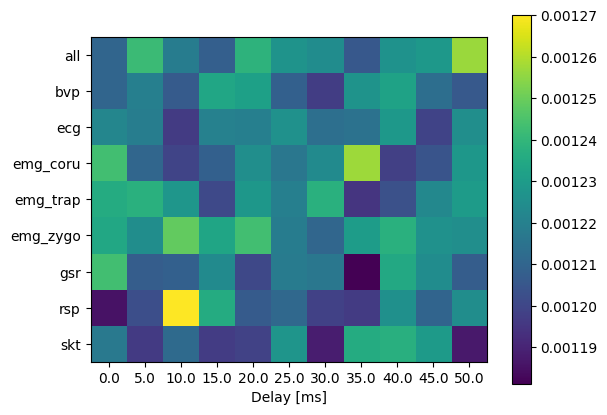

In [43]:
plt.imshow(data)#, interpolation='sinc')
plt.gca().set_xticks(range(11))
plt.gca().set_xticklabels(df.offset)
plt.gca().set_yticks(range(9))
plt.gca().set_yticklabels(['_'.join(x.split('_')[1:]).split('.')[0] for x in files])
plt.xlabel('Delay [ms]')
plt.colorbar()

## Generate table 2 of the paper

In [74]:
mins = np.argmin(data, axis=0)
for delay in range(data.shape[1]):
    dd = data[:,delay] * 1000
    print(f"{(delay*5)/1000} & {dd[0]:.3} & {dd[1]:.3} & {dd[2]:.3} & {dd[3]:.3} & {dd[4]:.3} & {dd[5]:.3} & {dd[6]:.3} & {dd[7]:.3} & {dd[8]:.3} \\\\")
    
mins

0.0 & 1.21 & 1.21 & 1.22 & 1.24 & 1.24 & 1.23 & 1.24 & 1.19 & 1.22 \\
0.005 & 1.24 & 1.22 & 1.22 & 1.21 & 1.24 & 1.22 & 1.21 & 1.2 & 1.2 \\
0.01 & 1.22 & 1.21 & 1.2 & 1.2 & 1.23 & 1.25 & 1.21 & 1.27 & 1.21 \\
0.015 & 1.21 & 1.23 & 1.22 & 1.21 & 1.2 & 1.23 & 1.22 & 1.24 & 1.2 \\
0.02 & 1.24 & 1.23 & 1.22 & 1.23 & 1.23 & 1.24 & 1.2 & 1.21 & 1.2 \\
0.025 & 1.23 & 1.21 & 1.23 & 1.22 & 1.22 & 1.22 & 1.22 & 1.21 & 1.23 \\
0.03 & 1.22 & 1.2 & 1.21 & 1.22 & 1.24 & 1.21 & 1.22 & 1.2 & 1.19 \\
0.035 & 1.21 & 1.23 & 1.21 & 1.26 & 1.19 & 1.23 & 1.18 & 1.2 & 1.24 \\
0.04 & 1.23 & 1.23 & 1.23 & 1.2 & 1.2 & 1.24 & 1.23 & 1.23 & 1.24 \\
0.045 & 1.23 & 1.21 & 1.2 & 1.2 & 1.22 & 1.23 & 1.22 & 1.21 & 1.23 \\
0.05 & 1.26 & 1.21 & 1.23 & 1.23 & 1.23 & 1.23 & 1.21 & 1.22 & 1.19 \\


array([7, 8, 2, 8, 8, 1, 8, 6, 3, 2, 8])

all 0.0012057809268727
bvp 0.0011972112148081
ecg 0.0011966781678542
emg_coru 0.001197888292407
emg_trap 0.0011948845744912
emg_zygo 0.0012106630537245
gsr 0.0011811541353398
rsp 0.0011856392318127
skt 0.0011872058711688


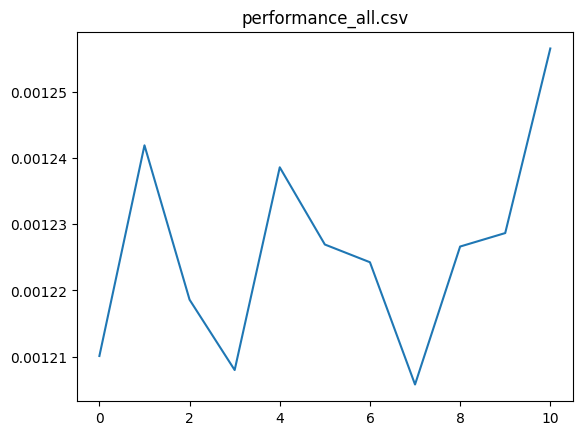

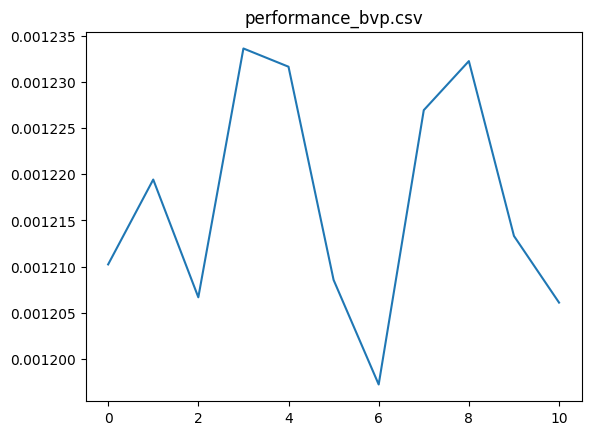

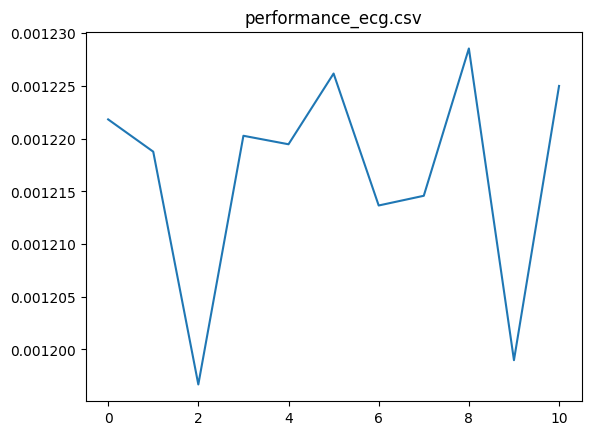

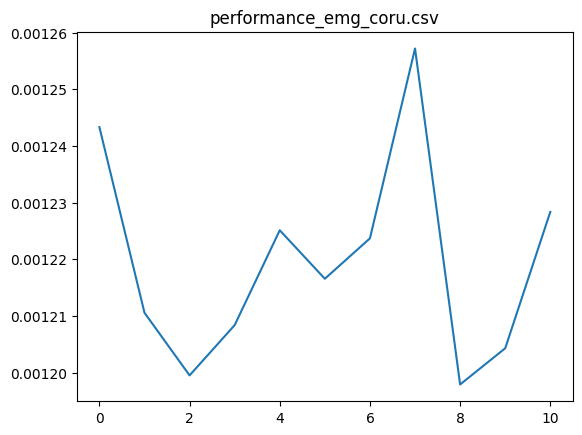

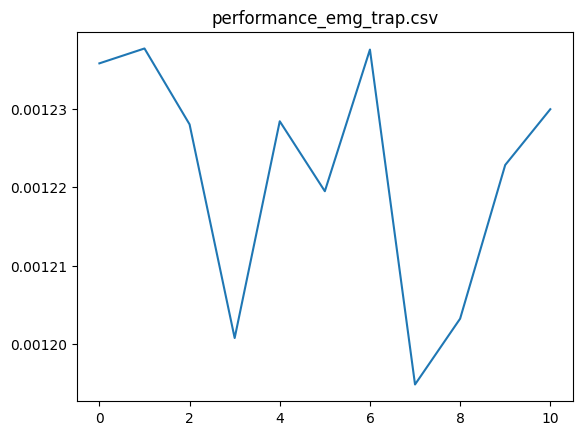

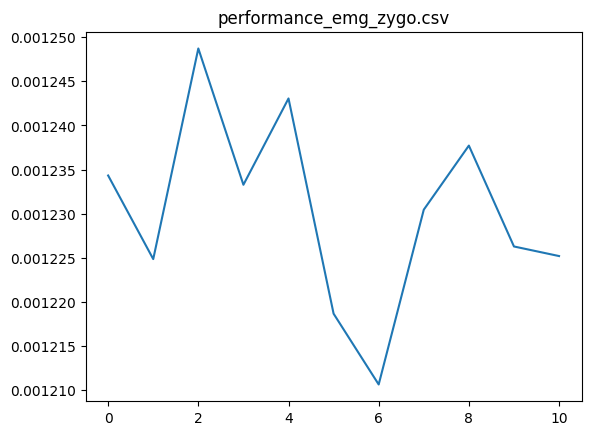

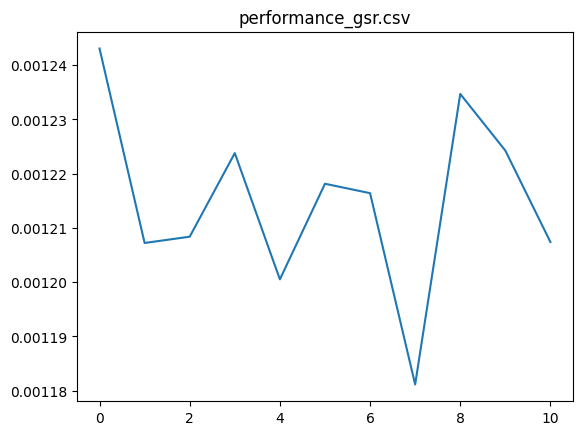

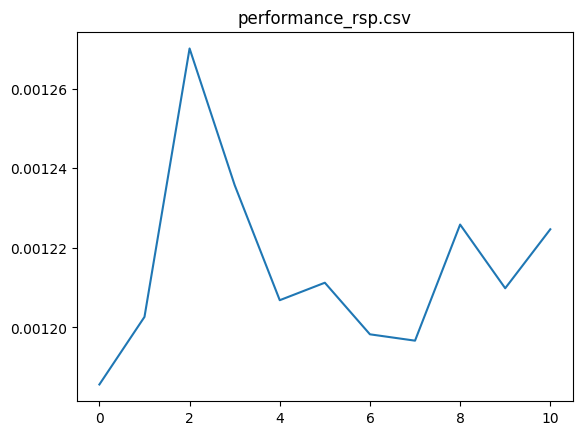

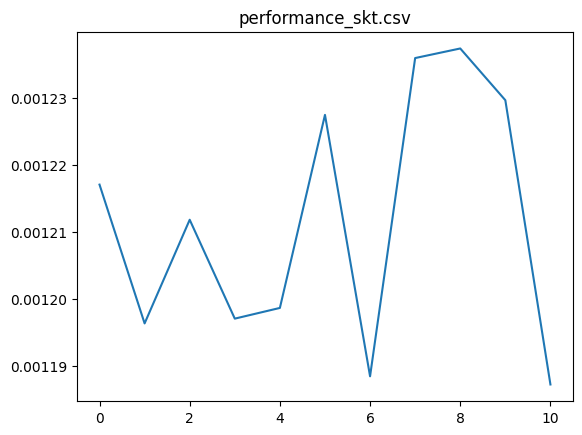

In [45]:
for kk in range(len(files)):
    plt.figure()
    plt.plot(data[kk,:])
    plt.title(files[kk])
    print('_'.join(files[kk].split('_')[1:]).split('.')[0], np.min(data[kk,:]))